# Pymaceuticals Inc.
---

### Analysis

- Capomulin appears to be an effective treatment for reducing tumor size in most test subjects, with similar results as Ramicane.
- Larger subjects had a tendency to maintain a higher average tumor for their weight class, with a positive correlation of .84, indicating a strong likelihood that a larger test subject would still maintain a larger average tumor.
- There were no outliers in the Capomulin test subjects, indicating no errant data collection or mismanaged testing.
 

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
count_of_mice = len(df["Mouse ID"].unique())
count_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = df[df.duplicated(subset=['Mouse ID', 'Timepoint']) == True]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df = df[df['Mouse ID'] == "g989"]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_count = len(clean_df["Mouse ID"].unique())
new_count


249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance_tumor = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tumor = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tumor = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err": sem_tumor
})

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_tumor_summary = clean_df.groupby(['Drug Regimen']).aggregate(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_tumor_summary
# Using the aggregation method, produce the same summary statistics in a single line.


C:\Users\alexh\AppData\Local\Temp\ipykernel_6436\3811988337.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_tumor_summary = clean_df.groupby(['Drug Regimen']).aggregate(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AttributeError: 'AxesSubplot' object has no attribute 'tight_layout'

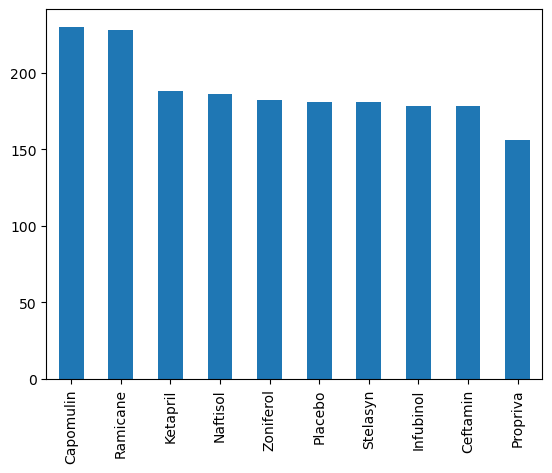

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# number_of_timepoints = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
# druggroup = clean_df.set_index(['Drug Regimen'])
# druggroup.plot(kind='bar', x=druggroup.index)

value_counts = clean_df['Drug Regimen'].value_counts().plot(kind="bar")
value_counts

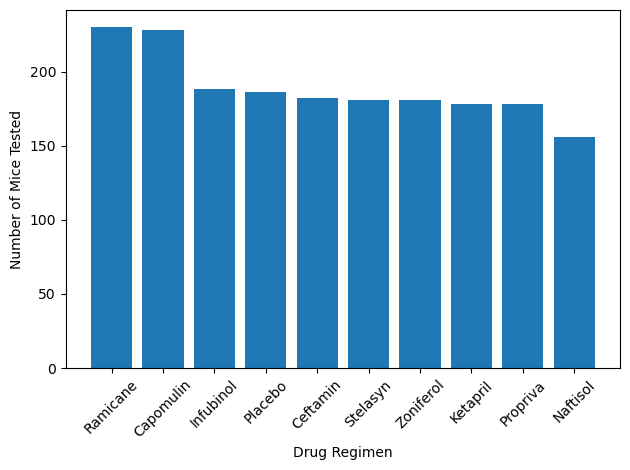

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = clean_df['Drug Regimen'].unique()
y_axis = clean_df['Drug Regimen'].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 45)
plt.ylabel('Number of Mice Tested')
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Sex'>

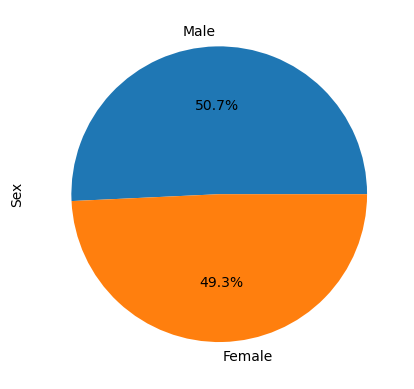

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x194e2f13550>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

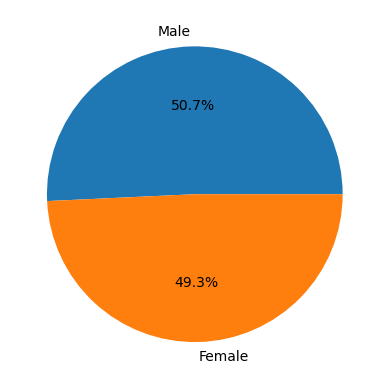

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts()
labels = clean_df['Sex'].unique()
plt.pie(sex_counts, labels=labels, autopct="%1.1f%%")



## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_max = clean_df.groupby(['Mouse ID']).max()['Timepoint'].to_frame()
df_max.head(15)
# clean_df.head(15)



,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
a401,45
a411,45
a444,45
a457,10


In [136]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, df_max, on='Mouse ID')
tumor_max = merged_df.loc[merged_df['Timepoint_x'] == merged_df['Timepoint_y']]
tumor_max_data = tumor_max['Tumor Volume (mm3)']
# tumor_max['Drug Regimen'].value_counts()

Ramicane     25
Capomulin    25
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ketapril     25
Propriva     25
Naftisol     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [166]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
drug1_data = []
drug2_data = []
drug3_data = []
drug4_data = []

# drug_data = {drug:[] for drug in treatments}

# [drug_data[row[tumor_max['Drug Regimen']]].append(row) for index, row in tumor_max.iterrows() if row[tumor_max['Drug Regimen']] in treatments]
# print(drug_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumors_quarts = tumor_max_data.quantile([.25,.5, .75])
lowerq = tumors_quarts[.25]
upperq = tumors_quarts[.75]
iqr = upperq - lowerq
iqr15 = iqr * 1.5

lower_bound = lowerq - iqr15
upper_bound = upperq + iqr15


# drug1_data = tumor_max.loc[tumor_max['Drug Regimen'] == 'Capomulin', ['Tumor Volume (mm3)']]
# drug1_data = drug1_data['Tumor Volume (mm3)']
# drug1_data


# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug1_data = tumor_max.loc[tumor_max['Drug Regimen'] == treatments[0], ['Tumor Volume (mm3)']]
    drug1_data = drug1_data['Tumor Volume (mm3)']
    drug2_data = tumor_max.loc[tumor_max['Drug Regimen'] == treatments[1], ['Tumor Volume (mm3)']]
    drug2_data = drug2_data['Tumor Volume (mm3)']
    drug3_data = tumor_max.loc[tumor_max['Drug Regimen'] == treatments[2], ['Tumor Volume (mm3)']]
    drug3_data = drug3_data['Tumor Volume (mm3)']
    drug4_data = tumor_max.loc[tumor_max['Drug Regimen'] == treatments[3], ['Tumor Volume (mm3)']]
    drug4_data = drug4_data['Tumor Volume (mm3)']


    

# for x in tumor_max['Drug Regimen']:
#     if str(tumor_max['Drug Regimen']) == treatments[0]:
#         drug_data.append(tumor_max['Tumor Volume (mm3)'])
# drug_data
# drug1_data
# tumor_max['Drug Regimen'].apply(lambda x: drug_data.append(tumor_max['Tumor Volume (mm3)']) if x in treatments else None)

# add subset



# Determine outliers using upper and lower bounds   
print(f"Values above {upper_bound} and below {lower_bound} are potential outliers in the whole data set")


Values above 93.49183637000002 and below 17.400437649999986 are potential outliers in the whole data set


C:\Users\alexh\AppData\Local\Temp\ipykernel_6436\4047917823.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments)


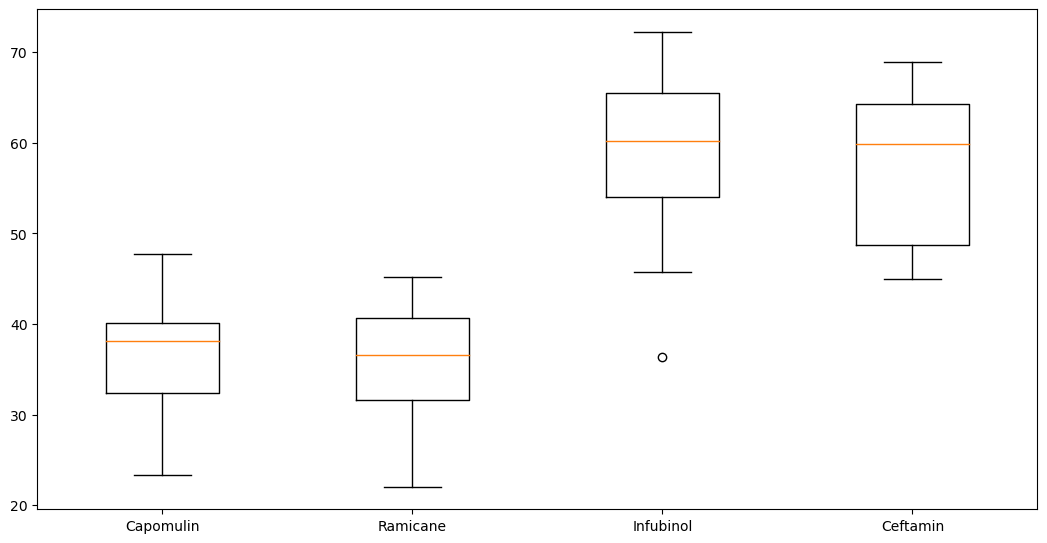

In [168]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_data = [drug1_data, drug2_data, drug3_data, drug4_data]
# ax1, fig1 = plt.subplots()
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(treatments)
drug_plot = ax.boxplot(drug_data)


plt.show()




## Line and Scatter Plots

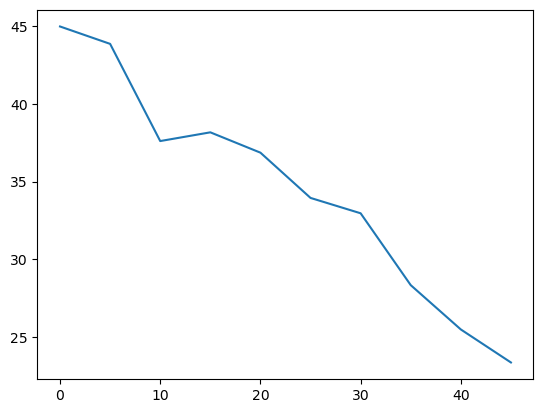

In [195]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
# mouse_ids = clean_df['Mouse ID'].unique()
# list(mouse_ids)
# capomulin.head()
capo_x = capomulin.loc[capomulin['Mouse ID'] == 's185', ['Timepoint']]
capo_y = capomulin.loc[capomulin['Mouse ID'] == 's185', ['Tumor Volume (mm3)']]

capo_eff, = plt.plot(capo_x,capo_y)
plt.show()



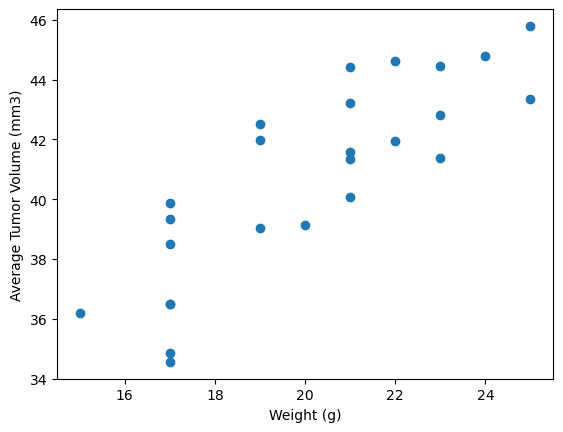

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = capomulin.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
mouse_weight = capomulin.groupby(['Mouse ID']).mean()['Weight (g)']
tumorvweight = plt.scatter(mouse_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


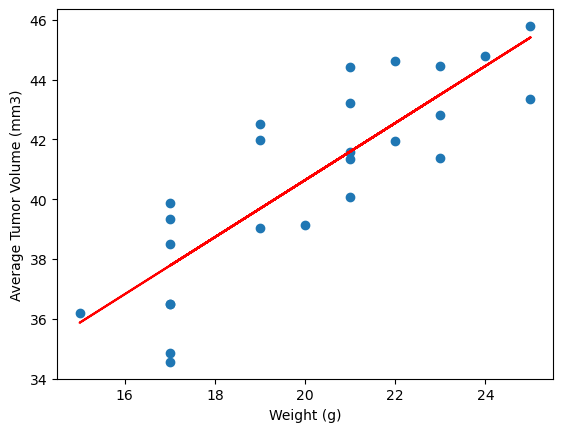

In [206]:
# Calculate the correlation coefficient and linear regression model

# for mouse weight and average tumor volume for the Capomulin regimen
mwslope, mwint, mwr, mwp, mwstd_err = st.linregress(mouse_weight, avg_tumor)
correlation = st.pearsonr(mouse_weight, avg_tumor)
mwfit = mwslope * mouse_weight + mwint
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
plt.scatter(mouse_weight, avg_tumor)
plt.plot(mouse_weight, mwfit, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
